# Explore here

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import pickle


In [90]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv'
pd.read_csv(url).to_csv('../data/raw/housing.csv')

In [91]:
df = pd.read_csv('../data/raw/housing.csv').drop(['Unnamed: 0'], axis= 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [93]:
df = df[['MedInc', 'Latitude', 'Longitude']]
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


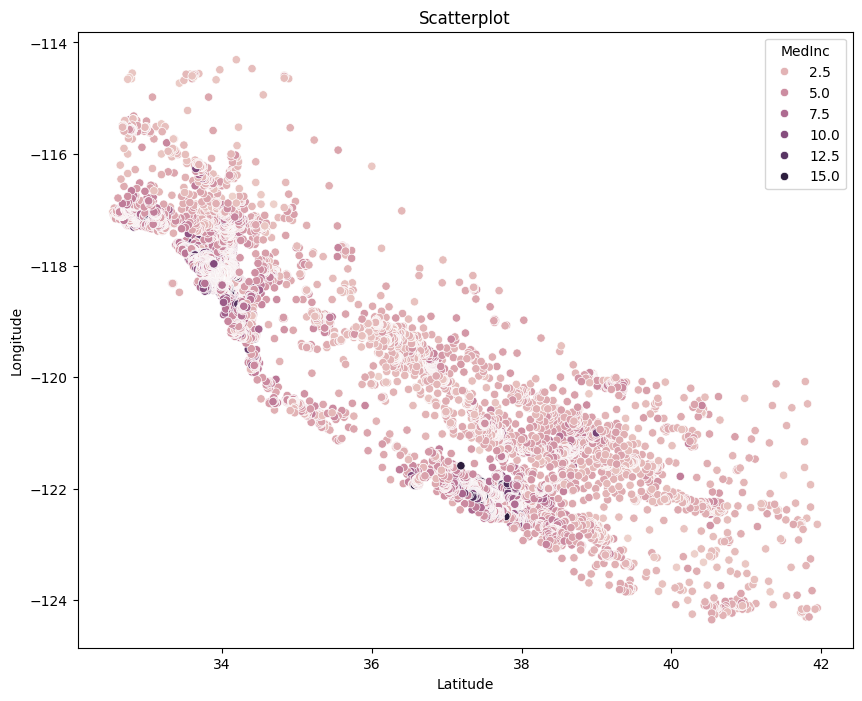

In [94]:
plt.figure(figsize=(10, 8))

sns.scatterplot(df, x= 'Latitude', y= 'Longitude', hue= 'MedInc')

plt.title('Scatterplot')
plt.show()

In [95]:
#split

train, test = train_test_split(df, test_size= 0.1, random_state= 42)

In [96]:
#model

model = KMeans(n_clusters= 6, random_state= 42)

model.fit(train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [97]:
centroids = model.cluster_centers_
labels = model.labels_

In [98]:
centroids, labels

(array([[   2.78679401,   33.8145388 , -117.81605854],
        [   2.66648763,   36.09176974, -119.72486184],
        [   5.53166236,   37.70419856, -121.95867225],
        [  10.48000041,   34.85186722, -119.18408714],
        [   5.31207285,   33.85910747, -118.02044098],
        [   2.83260104,   38.34942085, -121.89288667]]),
 array([0, 2, 5, ..., 0, 2, 5], shape=(18576,), dtype=int32))

In [99]:
train['Cluster'] = labels
train.head()

,MedInc,Latitude,Longitude,Cluster
5564,3.8372,33.91,-118.29,0
16016,8.0069,37.73,-122.46,2
17131,3.6712,37.46,-122.15,5
11752,3.1583,38.76,-121.21,5
2308,4.9292,36.83,-119.75,1


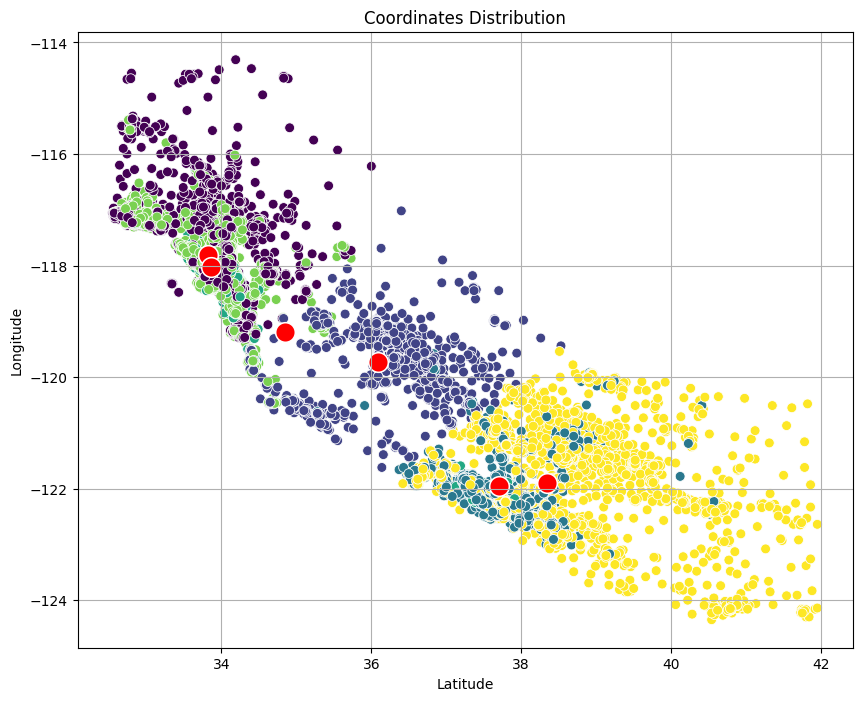

In [100]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x= train['Latitude'], y= train['Longitude'], c= train['Cluster'], s= 50)
sns.scatterplot(x = centroids[:, 1], y = centroids[:, 2], c= 'red', marker= 'o', s= 200)

plt.title('Coordinates Distribution')

plt.grid()
plt.show()

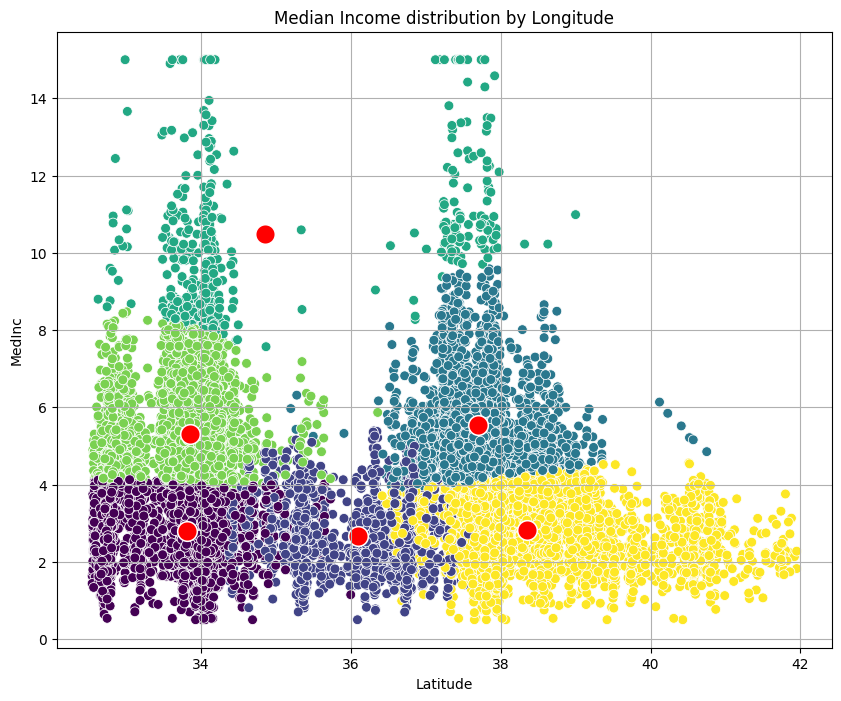

In [101]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x= train['Latitude'], y= train['MedInc'], c= train['Cluster'], s= 50)
sns.scatterplot(x = centroids[:, 1], y = centroids[:, 0], c= 'red', marker= 'o', s= 200)

plt.title('Median Income distribution by Longitude')

plt.grid()
plt.show()

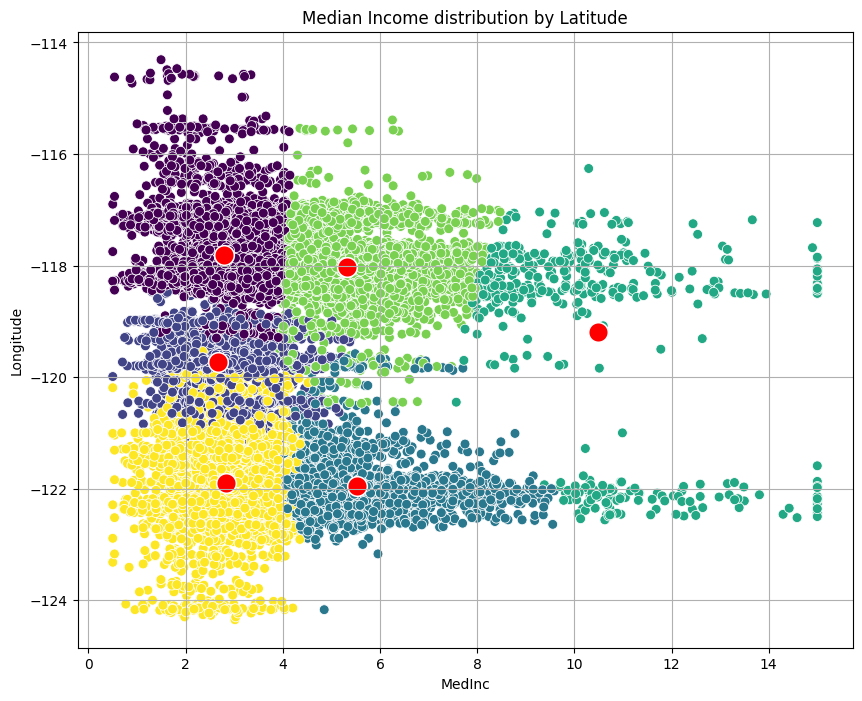

In [102]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x= train['MedInc'], y= train['Longitude'], c= train['Cluster'], s= 50)
sns.scatterplot(x = centroids[:, 0], y = centroids[:, 2], c= 'red', marker= 'o', s= 200)

plt.title('Median Income distribution by Latitude')

plt.grid()
plt.show()

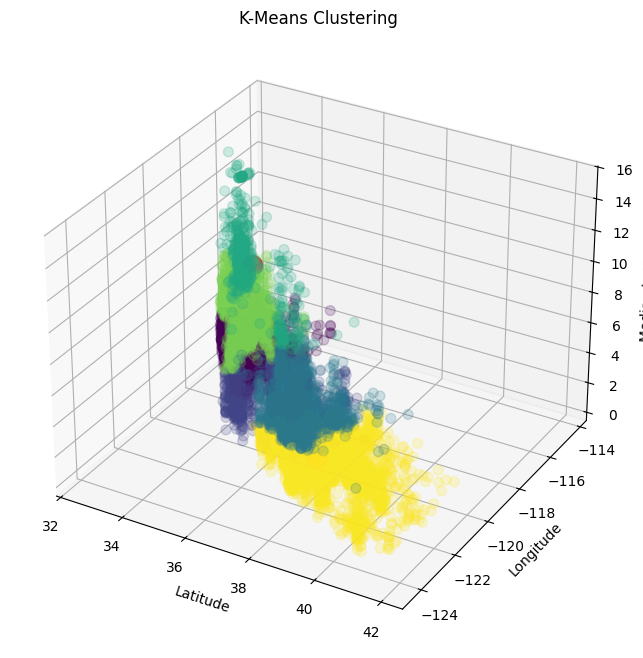

In [103]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train['Latitude'], train['Longitude'], train['MedInc'], c= train['Cluster'], s= 50, alpha= 0.2)
ax.scatter(centroids[:, 1], centroids[:, 2], centroids[:, 0], c= 'red', marker= 'o', s= 200)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Median Income')
ax.set_title('K-Means Clustering')


plt.show()

It Semms the clusters are bassed on Median Income

In [104]:
#prediction

predict = model.predict(test)

test['predict'] = predict

test.head()

,MedInc,Latitude,Longitude,predict
20046,1.6812,36.06,-119.01,1
3024,2.5313,35.14,-119.46,1
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,4
9814,3.7250,36.62,-121.93,5


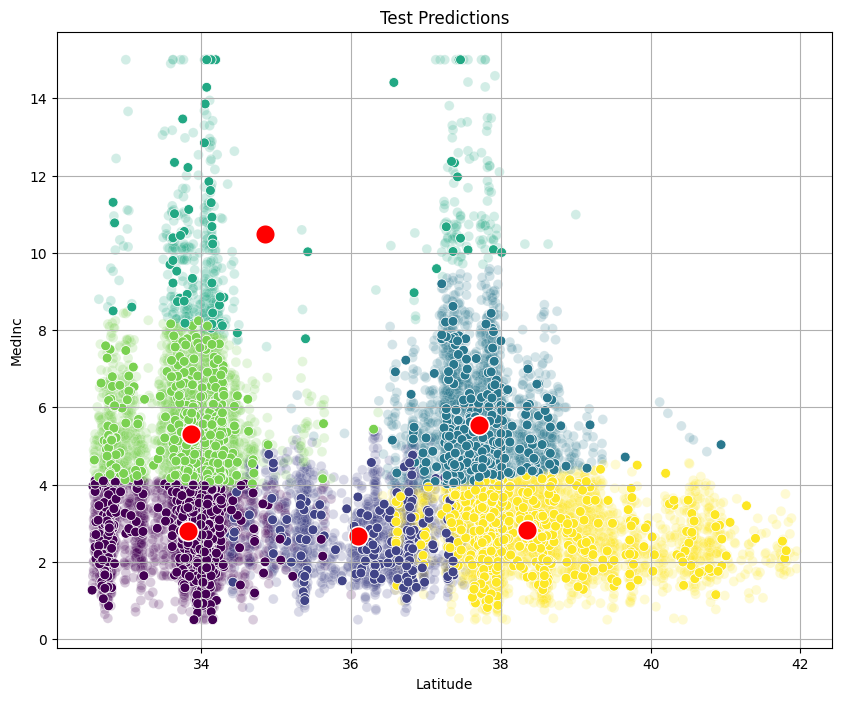

In [105]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x= train['Latitude'], y= train['MedInc'], c= train['Cluster'], s= 50, alpha= 0.2)
sns.scatterplot(x= test['Latitude'], y= test['MedInc'], c= test['predict'], s= 50)
sns.scatterplot(x = centroids[:, 1], y = centroids[:, 0], c= 'red', marker= 'o', s= 200)

plt.title('Test Predictions')

plt.grid()
plt.show()

In the plot it seems almost all predictions are clusterd well, we can see some yellow dots inside the blue dots zone and some green out of their area.

Now we proceed to train a Random Forest

In [106]:
#random forest

#Split X and y 
X_train = train[['Latitude', 'Longitude', 'MedInc']]
y_train = train['Cluster']

X_test = test[['Latitude', 'Longitude', 'MedInc']]
y_test = test['predict']

forest = RandomForestClassifier(random_state= 42)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       692
           1       0.99      1.00      1.00       157
           2       0.99      1.00      0.99       249
           3       0.98      0.97      0.98        66
           4       1.00      1.00      1.00       413
           5       1.00      1.00      1.00       487

    accuracy                           1.00      2064
   macro avg       0.99      0.99      0.99      2064
weighted avg       1.00      1.00      1.00      2064

0.9966085271317829


In [108]:
#save both models

with open('../models/KMeans.pkl', 'wb') as archive:
    pickle.dump(model, archive)

with open('../models/randomforest.pkl', 'wb') as archive:
    pickle.dump(forest, archive)